In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, train_test_split


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/pulsar_stars.csv')
print(df.columns)
print(df.describe())

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_deviation_of_the_DM_SNR_curve',
       ' Excess_kurtosis_of_the_DM_SNR_curve', ' Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')
       Mean_of_the_integrated_profile  \
count                    17898.000000   
mean                       111.079968   
std                         25.652935   
min                          5.812500   
25%                        100.929688   
50%                        115.078125   
75%                        127.085938   
max                        192.617188   

       Standard_deviation_of_the_integrated_profile  \
count                                  17898.000000   
mean                                      46.549532   
std                                        6.843189   
min           

In [ ]:
print(df['target_class'].value_counts()/len(df))
print(df.info())

0    0.908426
1    0.091574
Name: target_class, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean_of_the_integrated_profile                17898 non-null  float64
 1   Standard_deviation_of_the_integrated_profile  17898 non-null  float64
 2   Excess_kurtosis_of_the_integrated_profile     17898 non-null  float64
 3   Skewness_of_the_integrated_profile            17898 non-null  float64
 4   Mean_of_the_DM_SNR_curve                      17898 non-null  float64
 5   Standard_deviation_of_the_DM_SNR_curve        17898 non-null  float64
 6    Excess_kurtosis_of_the_DM_SNR_curve          17898 non-null  float64
 7    Skewness_of_the_DM_SNR_curve                 17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtyp

In [ ]:
import matplotlib.pyplot as plt

def evaluate(model, X, y, n_splits):
  k_flod = KFold(n_splits=n_splits)
  print(model)
  train_res = []
  test_res = []
  for i, (train_id, test_id) in enumerate(k_flod.split(X)):
    model.fit(X.loc[train_id], y[train_id])
    y_pred = model.predict(X.loc[train_id])
    train_res.append((y[train_id] == y_pred).sum() / len(y_pred))
    y_pred = model.predict(X.loc[test_id])
    test_res.append((y[test_id] == y_pred).sum() / len(y_pred))
  plt.plot([i+1 for i in range(n_splits)], train_res, 'b', label='Train Accuracy')
  plt.plot([i+1 for i in range(n_splits)], test_res, 'r', label='Test Accuracy')

  plt.title('Accuracy Plot')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

SVC()


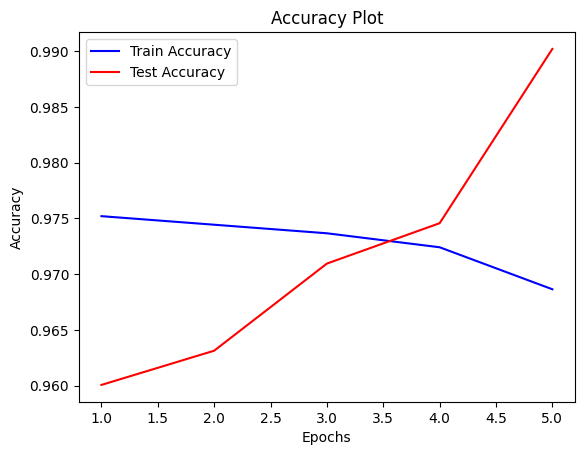

SVC(C=100)


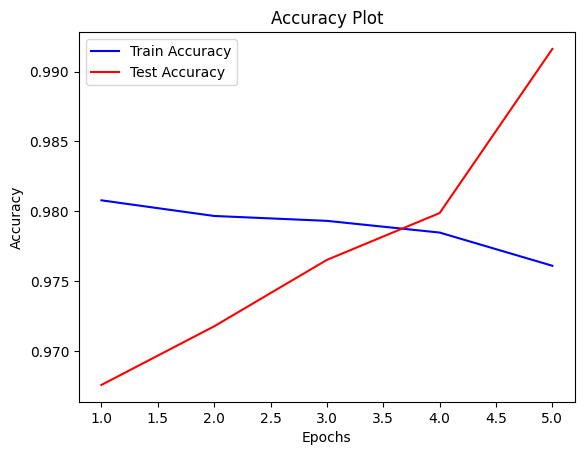

SVC(C=1000)


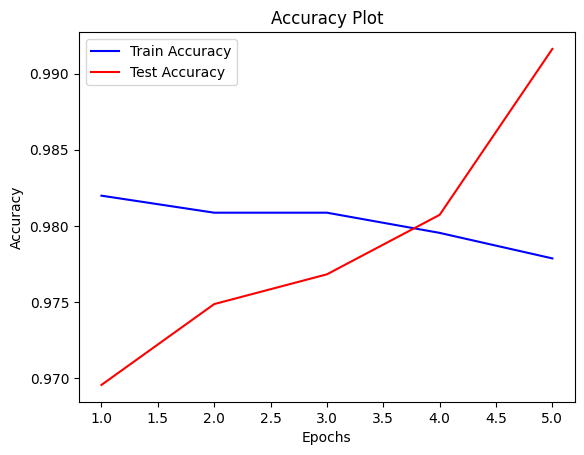

In [ ]:
from sklearn.svm import SVC
X = df.drop(['target_class'], axis=1)
y = df['target_class']
evaluate(SVC(), X, y, 5)
evaluate(SVC(C=100), X, y, 5)
evaluate(SVC(C=1000), X, y, 5)

SVC()


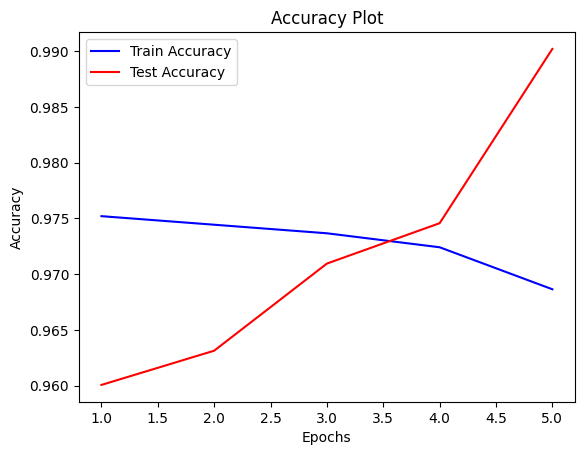

SVC(C=100)


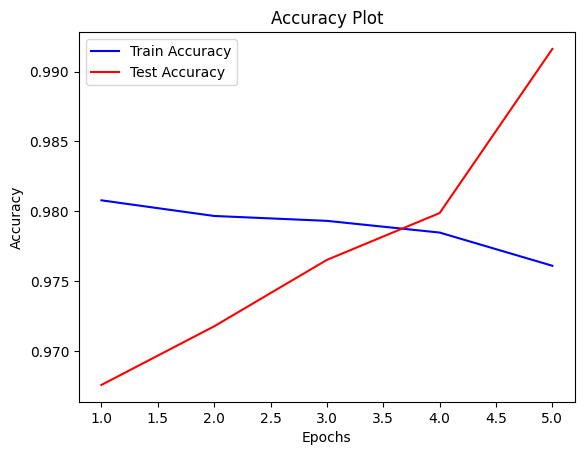

SVC(C=1000)


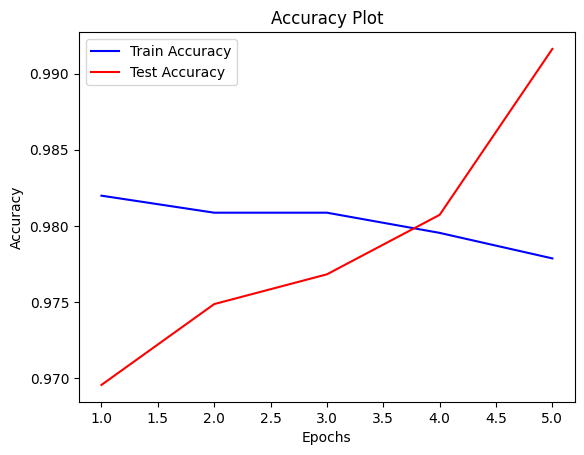

In [ ]:
evaluate(SVC(kernel='rbf'), X, y, 5)
evaluate(SVC(C=100, kernel='rbf'), X, y, 5)
evaluate(SVC(C=1000, kernel='rbf'), X, y, 5)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = SVC(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
grid_search.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import roc_curve
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()